In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
mbti_df = pd.read_csv('/Users/aungpao/Documents/Coding/MBTI_datavis/reddit_psychometric_data.csv')

In [3]:
post_df = mbti_df.filter(regex='^post_|^mbti_type') 

In [4]:
post_df['Sum_Post'] = post_df.sum(axis=1)
post_df[['mbti_type','Sum_Post']]

/var/folders/1t/_nlb566973l888n0yh0dkj1r0000gn/T/ipykernel_92447/1124860820.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  post_df['Sum_Post'] = post_df.sum(axis=1)
/var/folders/1t/_nlb566973l888n0yh0dkj1r0000gn/T/ipykernel_92447/1124860820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['Sum_Post'] = post_df.sum(axis=1)


,mbti_type,Sum_Post
0,INTP,100
1,ENTP,1
2,INFJ,100
3,INFP,82
4,ENTP,22
...,...,...
3581,INTP,6
3582,ENFP,79
3583,INTP,79
3584,INTP,0


**Repeat for comment**

In [5]:
comm_df = mbti_df.filter(regex='^comment_|^mbti_type') 
comm_df['Sum_Comment'] = post_df.sum(axis=1)
comm_df[['mbti_type','Sum_Comment']]

/var/folders/1t/_nlb566973l888n0yh0dkj1r0000gn/T/ipykernel_92447/2236273749.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comm_df['Sum_Comment'] = post_df.sum(axis=1)
/var/folders/1t/_nlb566973l888n0yh0dkj1r0000gn/T/ipykernel_92447/2236273749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_df['Sum_Comment'] = post_df.sum(axis=1)


,mbti_type,Sum_Comment
0,INTP,200
1,ENTP,2
2,INFJ,200
3,INFP,164
4,ENTP,44
...,...,...
3581,INTP,12
3582,ENFP,158
3583,INTP,158
3584,INTP,0


In [6]:
POST = post_df[['mbti_type','Sum_Post']]
COMM = comm_df[['mbti_type','Sum_Comment']]

In [7]:
def replace(df, COL, WORD, WITH):
    df.loc[df[COL].str.contains(WORD), COL] = WITH

In [8]:
replace(POST, 'mbti_type', 'I', 'Introvert')
replace(POST, 'mbti_type', 'E', 'Extrovert')
replace(COMM, 'mbti_type', 'I', 'Introvert')
replace(COMM, 'mbti_type', 'E', 'Extrovert')

In [9]:
POST.Sum_Post

0       100
1         1
2       100
3        82
4        22
       ... 
3581      6
3582     79
3583     79
3584      0
3585     52
Name: Sum_Post, Length: 3586, dtype: int64

In [10]:
COMM.Sum_Comment

0       200
1         2
2       200
3       164
4        44
       ... 
3581     12
3582    158
3583    158
3584      0
3585    104
Name: Sum_Comment, Length: 3586, dtype: int64

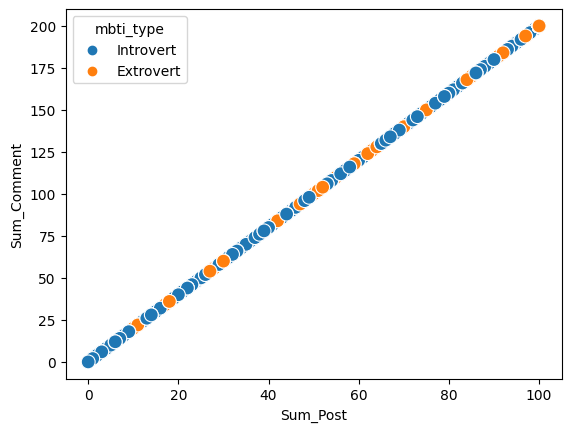

In [11]:
sns.scatterplot(
    x=POST.Sum_Post,
    y=COMM.Sum_Comment, 
    hue=POST.mbti_type, s=100
);

In [12]:
non_mbti_post = [
    'post_AskReddit', 'post_memes', 'post_teenagers'
    ,'post_dankmemes', 'post_Showerthoughts'
]

In [13]:
# replace the big df data 
mbti_df_work = mbti_df.copy()
replace(mbti_df_work, 'mbti_type', 'I', 'Introvert')
replace(mbti_df_work, 'mbti_type', 'E', 'Extrovert')

In [29]:
def report_scatter(TITLE, THREAD, LOG =False):
    plt.title(TITLE)
    if LOG is True:
        sns.set(style='whitegrid')
        plt.yscale("log")
    else:
        sns.set(style='whitegrid')
    sns.scatterplot(
        x=f'post_{THREAD}',
        y=f'comment_{THREAD}', 
        hue='mbti_type', s=40,
        data=mbti_df_work,
        palette=['steelblue','salmon']
    )
    plt.xlabel('Post')
    plt.ylabel('Comment')
    plt.savefig(f"{TITLE}.png")
    plt.figure(figsize=(10,6))
    plt.show();

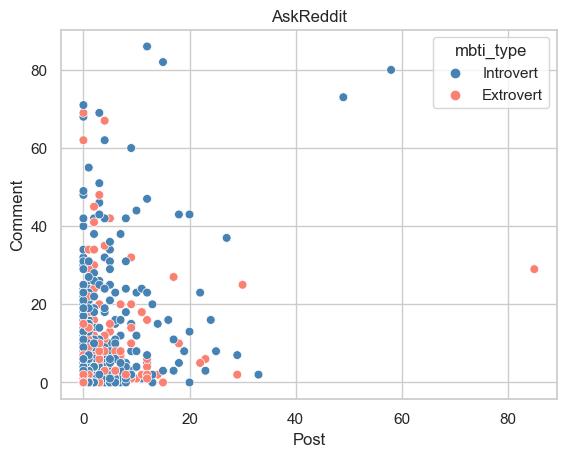

<Figure size 1000x600 with 0 Axes>

In [30]:
report_scatter('AskReddit', 'AskReddit')

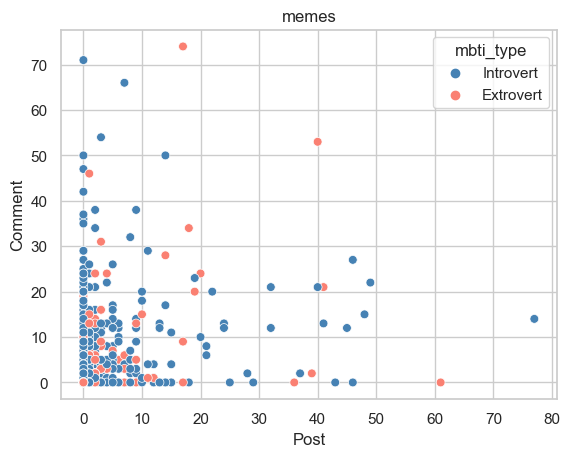

<Figure size 1000x600 with 0 Axes>

In [32]:
report_scatter('memes', 'memes')

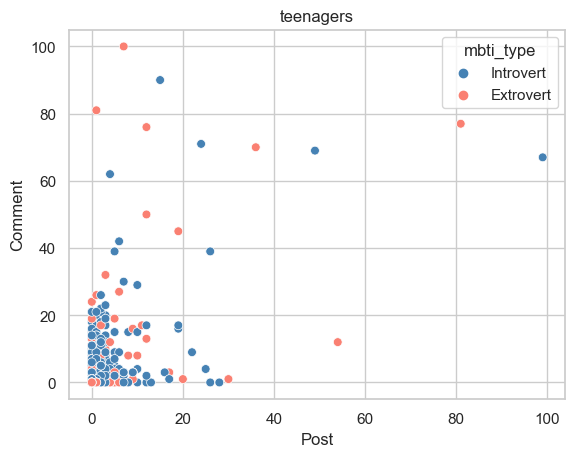

<Figure size 1000x600 with 0 Axes>

In [33]:
report_scatter('teenagers', 'teenagers')

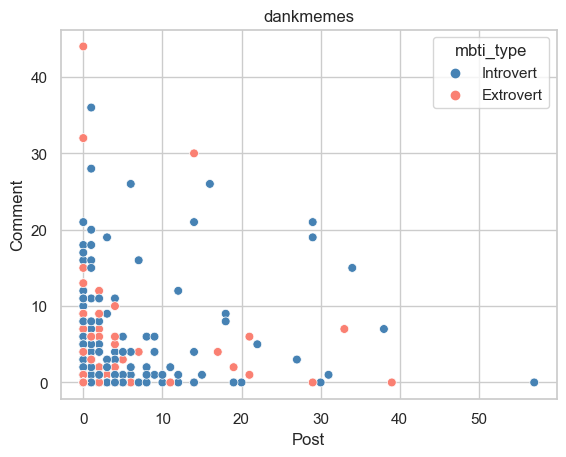

<Figure size 1000x600 with 0 Axes>

In [34]:
report_scatter('dankmemes', 'dankmemes')

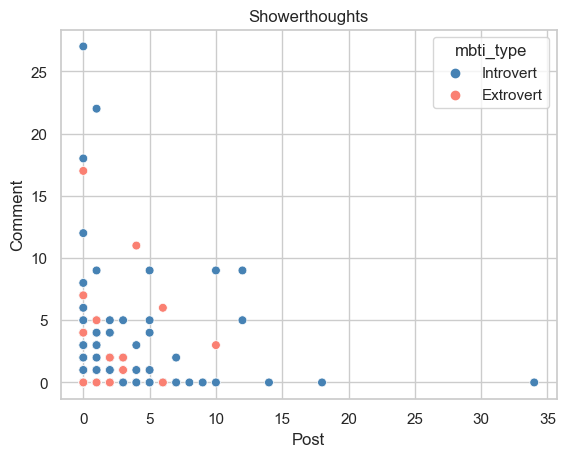

<Figure size 1000x600 with 0 Axes>

In [35]:
report_scatter('Showerthoughts', 'Showerthoughts')